In [1]:
import numpy as np
import pandas as pd
import io
import requests
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.special import erf

In [2]:
url="https://covid19.isciii.es/resources/serie_historica_acumulados.csv"
t=requests.get(url).text
s=t.split("NOTA")[0]

In [3]:
#df=pd.read_csv('serie_historica_acumulados.csv', parse_dates=True)

In [4]:
df=pd.read_csv(io.StringIO(s), parse_dates=True)

In [5]:
df.fillna(0, inplace=True)

In [6]:
df['FECHA'] = pd.to_datetime(df['FECHA'],dayfirst=True)

In [7]:
df

,CCAA,FECHA,CASOS,Hospitalizados,UCI,Fallecidos,Recuperados
0,AN,2020-02-20,0.0,0.0,0.0,0.0,0.0
1,AR,2020-02-20,0.0,0.0,0.0,0.0,0.0
2,AS,2020-02-20,0.0,0.0,0.0,0.0,0.0
3,IB,2020-02-20,1.0,0.0,0.0,0.0,0.0
4,CN,2020-02-20,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
1003,MC,2020-04-12,1463.0,543.0,94.0,101.0,353.0
1004,NC,2020-04-12,4092.0,1693.0,124.0,239.0,695.0
1005,PV,2020-04-12,11018.0,5622.0,464.0,831.0,5026.0
1006,RI,2020-04-12,3358.0,1141.0,73.0,223.0,1458.0


In [8]:
#df=df[df['CCAA']=='GA']

In [9]:
df = df.groupby('FECHA')['Fallecidos'].sum().to_frame()

In [10]:
df=df.sort_values(by='Fallecidos')

In [11]:
df['Index'] = range(1, len(df) + 1)

In [12]:
df=df.set_index('Index')

In [13]:
df['Dif. fallecidos'] = df['Fallecidos'] - df['Fallecidos'].shift(1)

In [14]:
df.fillna(0, inplace=True)

In [15]:
df.drop('Fallecidos', axis=1, inplace=True)

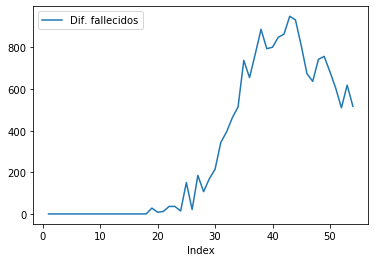

In [16]:
df.plot()

In [17]:
yData=df[df['Dif. fallecidos']>0].to_numpy()
yData=yData.reshape(yData.size)
xData=np.arange(yData.size)

In [18]:
yData

array([ 28.,   8.,  12.,  36.,  36.,  14., 151.,  21., 185., 107., 169.,
       215., 344., 394., 462., 514., 738., 655., 769., 887., 794., 801.,
       849., 864., 950., 932., 809., 674., 637., 743., 757., 683., 605.,
       510., 619., 517.])

In [19]:
#Example of regression function - Polynomial
#def func(x, a ,b, c, d):
#    return a*np.exp(b*x)
#    return a+ b*x + c*pow(x,2)+ d*pow(x,3) #+ e*pow(x,4) + f*pow(x,5) + g*pow(x,6)

In [20]:
#Example of regression function
#def func(x, amp, cen, wid):
#    return amp * np.exp(-(x-cen)**2 / wid)

In [21]:
#Regression function - skew normal
def func(x, sigmag, mu, alpha,a):
    c = 0
    #normal distribution
    normpdf = (1/(sigmag*np.sqrt(2*np.pi)))*np.exp(-(np.power((x-mu),2)/(2*np.power(sigmag,2))))
    normcdf = (0.5*(1+erf((alpha*((x-mu)/sigmag))/(np.sqrt(2)))))
    return 2*a*normpdf*normcdf + c

In [22]:
popt, pcov = curve_fit(func, xData, yData, p0=(1,1,1,20000))
print(popt)
print(pcov)

[1.75870614e+01 1.43831823e+01 3.44508031e+00 2.25479278e+04]
[[ 2.78206459e+00 -6.97939014e-01  1.01058328e+00  1.71551224e+03]
 [-6.97939014e-01  2.38084760e-01 -2.72672424e-01 -4.02865073e+02]
 [ 1.01058328e+00 -2.72672424e-01  4.51931688e-01  5.61550522e+02]
 [ 1.71551224e+03 -4.02865073e+02  5.61550522e+02  1.25762587e+06]]


In [23]:
xFit = np.arange(0.0, yData.size + 10, 1)

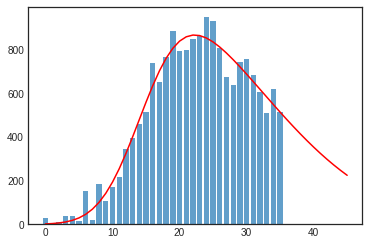

In [24]:
plt.style.use('seaborn-white')
plt.bar(xData, yData, align='center', alpha=0.7)
plt.plot(xFit, func(xFit, *popt), 'r')
plt.show()

In [25]:
#Prediction for the next day:
int(func(yData.size, *popt))

480